In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
annotations_file = 'annotations.csv'

In [3]:
anno = pd.read_csv(annotations_file)
anno.head()

,filename,x1,y1,x2,y2,class
0,db_lisa_tiny/sample_001.png,190,40,211,63,stop
1,db_lisa_tiny/sample_002.png,4,246,43,283,stop
2,db_lisa_tiny/sample_003.png,389,286,418,314,stop
3,db_lisa_tiny/sample_004.png,307,243,315,251,stop
4,db_lisa_tiny/sample_005.png,377,249,398,270,stop


In [6]:
# Code for plotting bounding box
def plot_bbox(img_id):
  img_url = img_id
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = anno[anno['filename']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['x1']
      xmax = row['x2']
      ymin = row['y1']
      ymax = row['y2']
      label_name = row['class']
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, label_name, (xmin,ymin-10), font, 1, (0,255,0), 2)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Image: (480, 704, 3)
Coordinates: (190, 40), (211, 63)


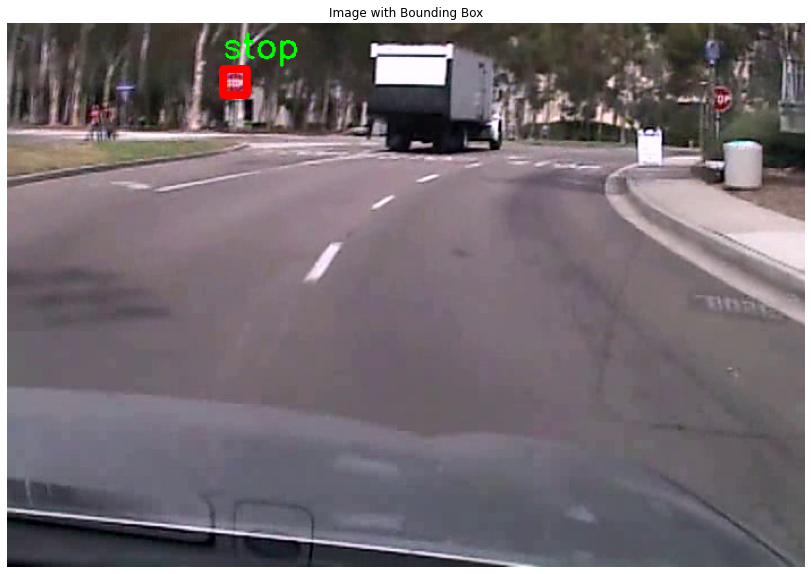

In [7]:
plot_bbox("db_lisa_tiny/sample_001.png")

Image: (480, 704, 3)
Coordinates: (384, 242), (427, 292)


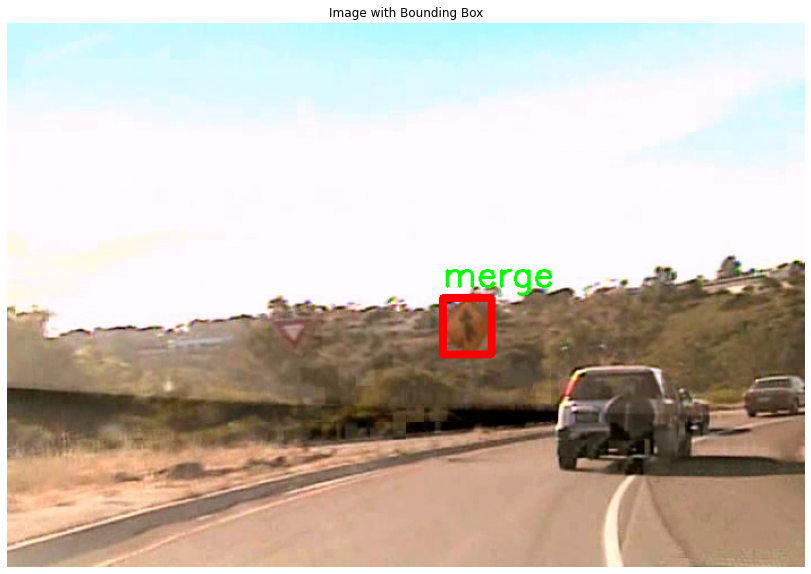

Image: (480, 704, 3)
Coordinates: (437, 255), (492, 304)


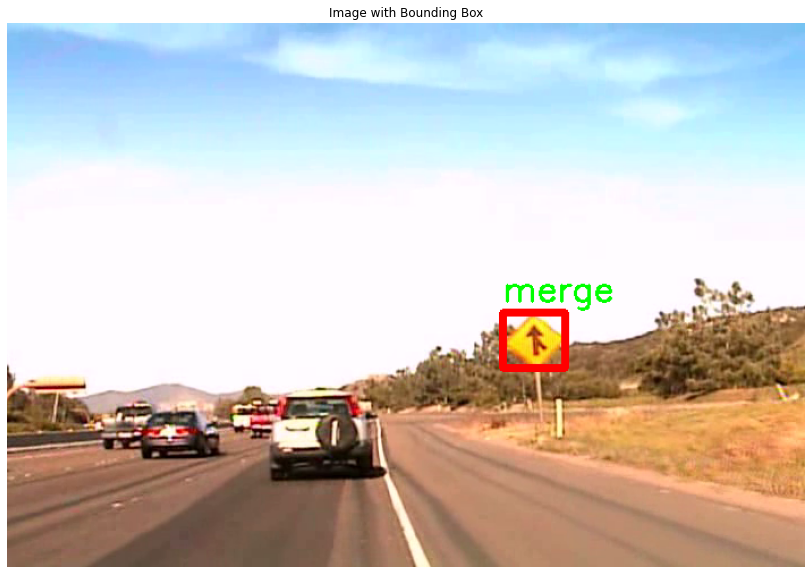

Image: (480, 704, 3)
Coordinates: (622, 257), (664, 299)


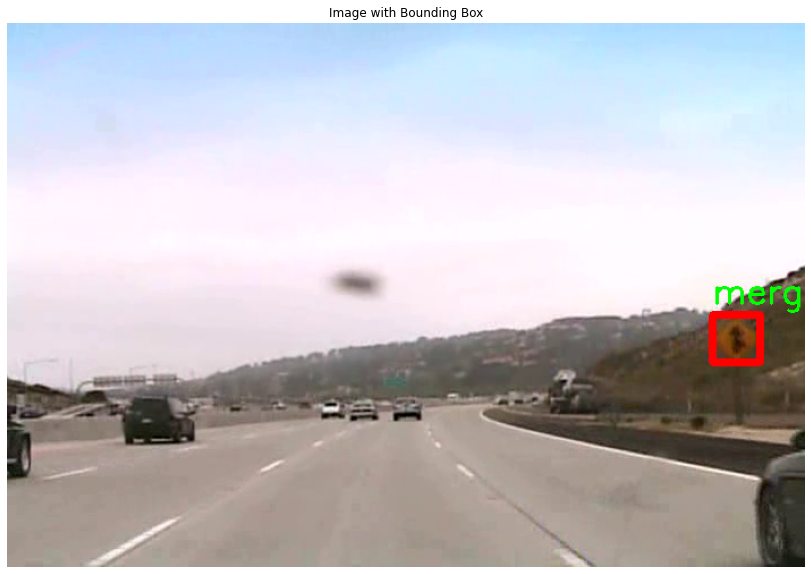

Image: (480, 704, 3)
Coordinates: (542, 254), (575, 292)


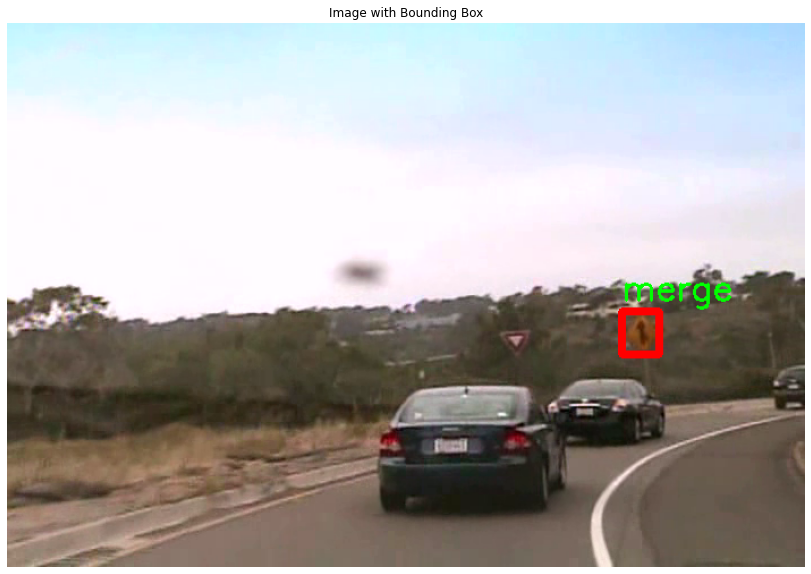

Image: (480, 704, 3)
Coordinates: (537, 254), (594, 305)


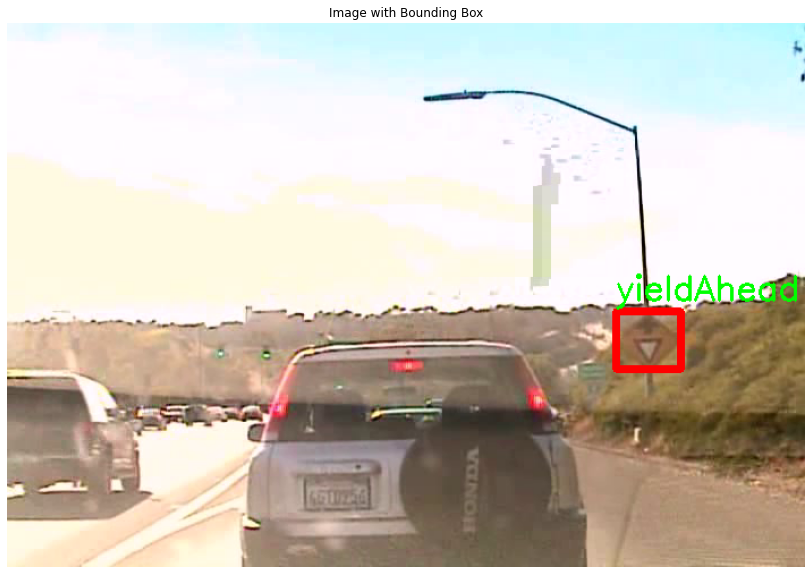

In [8]:
least_objects_img_ids = anno["filename"].value_counts().tail(50).index.values

for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)